In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df[df.url.str.match('https://www.zomato.com/mumbai/*')]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [5]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [6]:
df.rename({'listed_in(city)' : 'city_listed_in'}, axis=1, inplace=True)

In [7]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [8]:
df.rename({'listed_in(type)' : 'type'}, axis=1, inplace=True)

In [9]:
df.drop('menu_item', axis=1,inplace=True)

In [10]:
df.drop(['reviews_list', 'dish_liked'], axis=1,inplace=True)

In [11]:
df.drop(['phone', 'url', 'address'], axis=1, inplace=True)

In [12]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),type,city_listed_in
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   type                         51717 non-null  object
 10  city_listed_in               51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [5]:
df.drop(df[df.rate.isna()].index, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43942 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          43942 non-null  object
 1   address                      43942 non-null  object
 2   name                         43942 non-null  object
 3   online_order                 43942 non-null  object
 4   book_table                   43942 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        43942 non-null  int64 
 7   phone                        43110 non-null  object
 8   location                     43942 non-null  object
 9   rest_type                    43791 non-null  object
 10  dish_liked                   23609 non-null  object
 11  cuisines                     43931 non-null  object
 12  approx_cost(for two people)  43690 non-null  object
 13  reviews_list                 43

In [7]:
df.drop(df[df.rest_type.isna()].index, inplace = True)
df.drop(df[df.cuisines.isna()].index, inplace = True)

In [8]:
df.drop(df[df['approx_cost(for two people)'].isna()].index, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43533 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43533 non-null  object
 1   online_order                 43533 non-null  object
 2   book_table                   43533 non-null  object
 3   rate                         43533 non-null  object
 4   votes                        43533 non-null  int64 
 5   location                     43533 non-null  object
 6   rest_type                    43533 non-null  object
 7   cuisines                     43533 non-null  object
 8   approx_cost(for two people)  43533 non-null  object
 9   type                         43533 non-null  object
 10  city_listed_in               43533 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.0+ MB


In [9]:
df.rename({'approx_cost(for two people)' : 'two_people_cost'}, axis=1, inplace=True)

In [10]:
counts = df.rest_type.value_counts()
counts.to_csv('counts',index=True)

In [11]:
df.rate = df.rate.str.split('/').str[0]

In [12]:
df.drop(df[df['rate'] == 'NEW'].index, inplace = True)
df.drop(df[df['rate'] == '-'].index, inplace = True)
df.rate = pd.to_numeric(df.rate)


In [13]:
counts = df.two_people_cost.value_counts()
counts.to_csv('counts',index=True)

In [14]:
df.two_people_cost = df.two_people_cost.str.replace(',', '')
df.two_people_cost = pd.to_numeric(df.two_people_cost)

In [15]:
counts = df.name.value_counts()
counts.to_csv('counts.csv',index=True)

In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
df[df.name.str.contains('Chime.*')]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,two_people_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
41171,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Dine-out,Whitefield
41230,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Drinks & nightlife,Whitefield
41261,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [18]:
rem_type = df.drop('type', axis=1)

KeyError: "['type'] not found in axis"

In [19]:
rem_type[rem_type.duplicated()]

NameError: name 'rem_type' is not defined

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41263 entries, 0 to 41262
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              41263 non-null  object 
 1   address          41263 non-null  object 
 2   name             41263 non-null  object 
 3   online_order     41263 non-null  object 
 4   book_table       41263 non-null  object 
 5   rate             41263 non-null  float64
 6   votes            41263 non-null  int64  
 7   phone            40687 non-null  object 
 8   location         41263 non-null  object 
 9   rest_type        41263 non-null  object 
 10  dish_liked       23259 non-null  object 
 11  cuisines         41263 non-null  object 
 12  two_people_cost  41263 non-null  int64  
 13  reviews_list     41263 non-null  object 
 14  menu_item        41263 non-null  object 
 15  listed_in(type)  41263 non-null  object 
 16  listed_in(city)  41263 non-null  object 
dtypes: float64(1

In [21]:
df.rest_type.nunique()

87

In [22]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,two_people_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [23]:
df.describe()

,rate,votes,two_people_cost
count,41263.000000,41263.000000,41263.000000
mean,3.702011,352.683179,603.914063
std,0.439985,884.177761,464.942973
min,1.800000,0.000000,40.000000
25%,3.400000,21.000000,300.000000
50%,3.700000,73.000000,500.000000
75%,4.000000,277.000000,750.000000
max,4.900000,16832.000000,6000.000000


In [24]:
df.cuisines.nunique()

2367

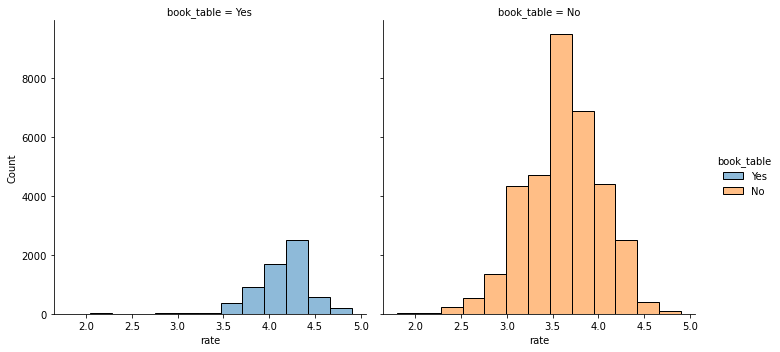

In [25]:
sns.displot(kind='hist', data=df, x='rate', col='book_table', hue='book_table', bins=13)

In [36]:
df.rest_type.nunique()

87

In [26]:
sns.displot(kind='kde', data=df, x='rate', col='type', col_wrap=7)

ValueError: Could not interpret value `type` for parameter `col`

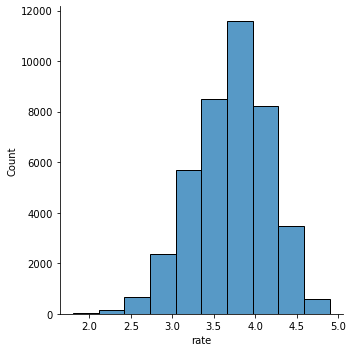

In [27]:
sns.displot(kind='hist', data=df, x='rate', bins=10)

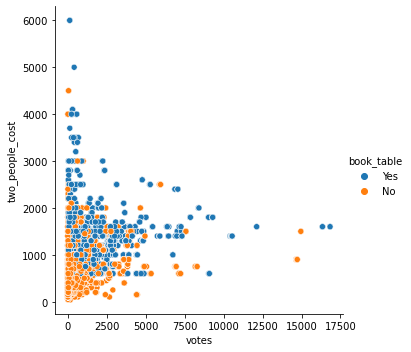

In [28]:
sns.relplot(data=df, kind='scatter', x='votes', y='two_people_cost', hue='book_table')